In [298]:
#  immport libraries
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Original Image

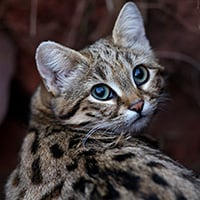

In [299]:
# Read input image
img = cv2.imread('/content/cat.jpg')
# Convert to Gray imagex
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

Image after grey scale conversion

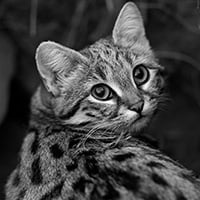

In [300]:
cv2_imshow(gray)

In [301]:

image_width = gray.shape[0]
image_height = gray.shape[1]
step_size = 5 # NxN neighborhood around each pixel
window_size = (5,5)  # Window Size

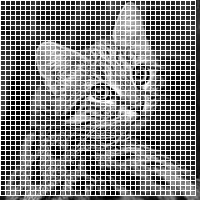

In [302]:
import matplotlib.pyplot as plt
count = 0
dict = {"window_id" : [],
        "window_avg_brightness" : []};
temp = 0
for x in range(0, image_height - window_size[0],step_size):
    for y in range(0, image_width - window_size[1],step_size):
      window = gray[x:x + window_size[0], y:y + window_size[1]]
      dict["window_id"].append([x,y])
      dict["window_avg_brightness"].append(window.mean())
      cv2.rectangle(gray, (x, y), (x + window_size[0], y + window_size[1]), (255, 0)) # draw rectangle grid on gray image
cv2_imshow(gray)


In [303]:
# Sort the grid values according to the highest average brightness
index = sorted(range(len(dict["window_avg_brightness"])), key=lambda i: dict["window_avg_brightness"][i], reverse=True)[:4]

In [304]:
# Extract grid information and store it to a list
list = []
for i in range(len(dict["window_avg_brightness"])):
    if i in index:
      list.append(dict["window_id"][i])


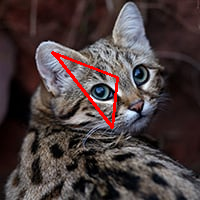

True

In [305]:
isClosed = True   # for closed polygon
color = (0, 0, 255)  # red color quadilateral
thickness = 2  # Line thickness of 2 px

#  polygon points 
pts = np.array([[[50+step_size/2, 50+step_size/2], [55+step_size/2, 55+step_size/2], [110+step_size/2, 125+step_size/2], [115+step_size/2, 75+step_size/2]]], np.int32)
image = cv2.polylines(img, [pts] , isClosed, color, thickness)
cv2_imshow(image)  #  display output image with quadilateral

filename = '/content/output.png'  # Filename
cv2.imwrite(filename, image)  # Saving the image
